In [995]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import chi2

In [996]:
s = [
    25.0000,
    35.0000,
    70.1038,
    84.5303,
    119.5981,
    -7.5172,
    119.9330,
    -1.4221,
    293.6667,
    -49.6642,
    159.0527,
    127.0557,
    136.2653,
    164.3801,
    199.0974,
    150.3093,
    143.5554,
    108.0112,
    261.2849,
    158.9485,
    310.6697,
    183.2096,
    236.4357,
    303.1682,
    256.8915,
    246.8249,
    309.4960,
    257.9478,
    444.6323,
    316.2758,
    364.1915,
    348.7780,
    287.5978,
    384.0246,
    336.7386,
    359.6682,
    484.9397,
    271.0097,
    413.5242,
    412.4660,
    426.3690,
    511.7404,
    373.6591,
    532.1087,
    440.7739,
    497.9429,
    441.6739,
    501.2538,
    604.2300,
    434.7302,
    606.0768,
    471.2449,
    685.2812,
    576.4088,
    662.4752,
    459.0886,
    640.3297,
    532.5155,
    660.7406,
    485.0263,
    729.8990,
    638.9653,
    673.6654,
    667.3964,
    686.5004,
    763.2054,
    668.5730,
    720.1473,
    776.8435,
    688.6064,
    746.5756,
    842.8371,
    624.1283,
    772.3539,
    715.1324,
    739.4710,
    842.2981,
    764.8168,
    848.4336,
    907.2527,
    716.0300,
    987.4091,
    720.1152,
    1031.9428,
    775.7215,
    957.3348,
    835.9828,
    883.1102,
    918.6166,
    968.6066,
    954.2682,
    918.8956,
    992.5183,
    935.3576,
    991.4509,
    978.3907,
    944.6625,
    1077.5152,
    929.9026,
    1153.4844,
    944.1242,
    1130.1029,
    934.2922,
    1287.4132,
    946.1756,
    1252.9690,
    942.2875,
    1199.3560,
    920.1098,
    1327.9799,
    1025.3957,
    1228.7079,
    1041.2672,
    1267.9531,
    1123.8040,
    1303.8799,
    1177.1663,
    1267.8995,
    1177.2875,
    1256.2141,
    1192.6951,
    1332.2928,
    1097.8389,
    1410.0089,
    1245.1156,
    1247.2260,
    1350.8053,
    1287.6591,
    1319.4396,
    1361.6961,
    1293.6288,
    1358.5628,
    1225.0286,
    1374.5823,
    1240.7892,
    1423.1759,
    1320.2498,
    1440.8703,
    1336.6941,
    1359.3949,
    1449.4506,
    1346.3175,
    1531.9715,
    1432.9602,
    1479.4825,
    1368.5968,
    1429.6616,
    1528.4216,
    1438.2690,
    1554.8129,
    1432.9626,
    1534.7793,
    1582.4953,
    1459.3582,
    1696.5657,
    1470.5440,
    1734.5468,
    1430.6352,
    1694.6880,
    1582.5133,
    1640.2080,
    1480.2197,
    1818.0879,
    1516.0005,
    1930.4322,
    1500.7392,
    1877.0032,
    1470.3804,
    1827.4579,
    1631.7799,
    1841.1922,
    1602.7677,
    1933.0599,
    1599.2733,
    1841.7906,
    1605.3239,
    1899.3051,
    1715.9789,
    1890.1766,
    1705.5104,
    1880.5807,
    1730.7058,
    1938.8621,
    1765.6631,
    1947.4175,
    1844.6158,
    1863.0230,
    1967.2029,
    1811.9477,
    1918.9145,
    1850.7010,
    1944.2233,
    1973.2225,
    1896.6238,
    1998.8234,
    1940.3606,
    2018.0113,
    2085.5026,
    2008.8944,
    1935.0329,
]
s = np.array(s)

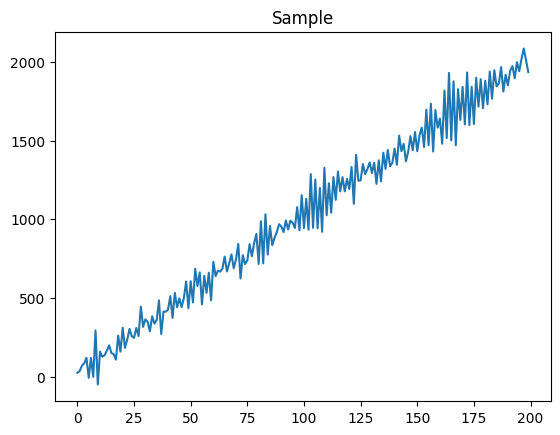

In [997]:
plt.title("Sample")
plt.plot(range(len(s)), s)
plt.savefig("Sample")

In [998]:
lag = 16
def calc_err(y):
    res = [[], []]
    for yy in y:
        if yy > 0:
            res[0].append(yy)
            res[1].append(0)
        else:
            res[1].append(-yy)
            res[0].append(0)
    return res
def show_acf(s, lag, name):
    acf_values = acf(s, nlags=lag, fft=True)
    plt.title(f"{name} ACF")
    plt.errorbar(range(lag+1), acf_values, yerr=calc_err(acf_values), marker="o",  linestyle='none')
    plt.plot([0, lag], [0, 0], color="black")
    inter = 1.96/np.sqrt(200)
    plt.plot([0, lag], [inter, inter], color="red")
    plt.plot([0, lag], [-inter, -inter], color="red")
    plt.xlabel("Lag")
    plt.ylabel("ACF")
    plt.savefig(f"{name} ACF")
def show_pacf(s, lag, name):
    pacf_values = pacf(s, nlags=lag, method="ywadjusted")
    plt.title(f"{name} PACF")
    plt.errorbar(range(lag+1), pacf_values, yerr=calc_err(pacf_values), marker="o",  linestyle='none')
    plt.plot([0, lag], [0, 0], color="black")
    inter = 1.96/np.sqrt(200)
    plt.plot([0, lag], [inter, inter], color="red")
    plt.plot([0, lag], [-inter, -inter], color="red")
    plt.xlabel("Lag")
    plt.ylabel("PACF")
    plt.savefig(f"{name} PACF")

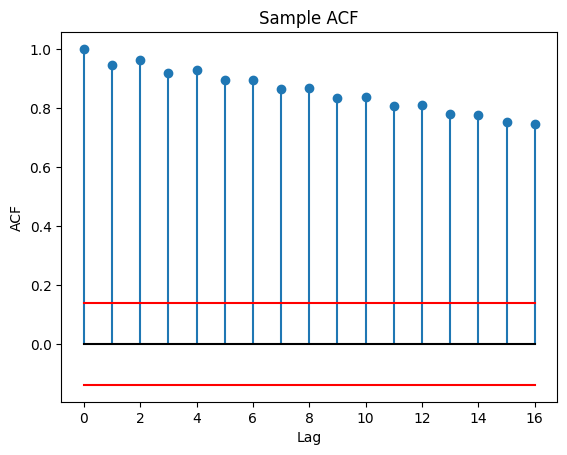

In [999]:
show_acf(s, lag, "Sample")

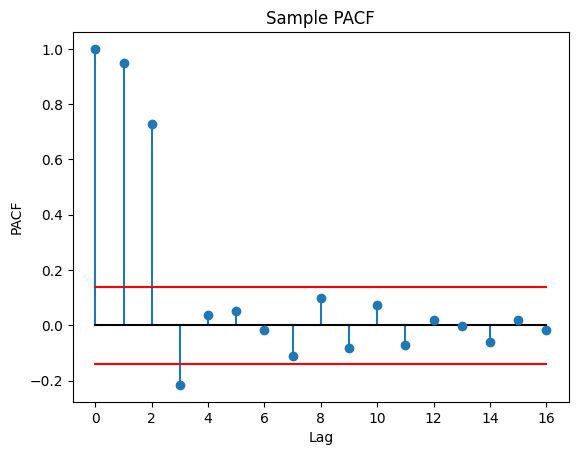

In [1000]:
show_pacf(s, lag, "Sample")

In [1001]:
s_d = scipy.signal.detrend(s)


9.920467133578335 36.19329020895461


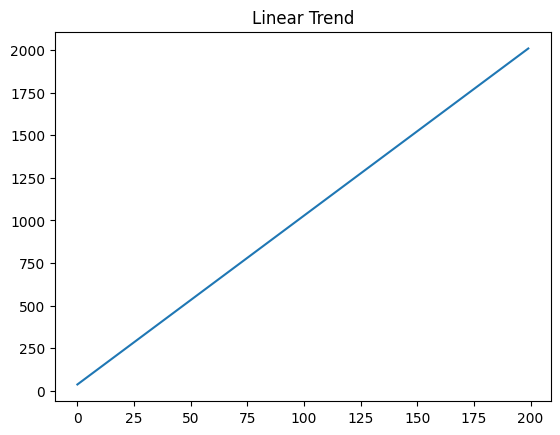

In [1002]:
a, b = np.linalg.solve(np.array([[0, 1],[199, 1]]), np.array([(s-s_d)[0], (s-s_d)[199]]))
print(a, b)
plt.title("Linear Trend")
plt.plot(range(len(s_d)), s-s_d)
plt.savefig("Linear Trend")

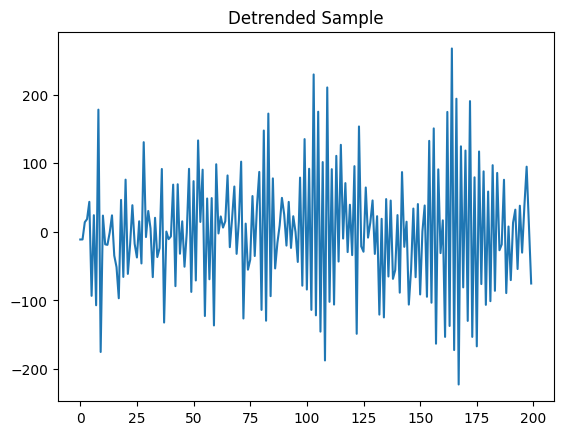

In [1003]:
plt.title("Detrended Sample")
plt.plot(range(len(s_d)), s_d)
plt.savefig("Detrended Sample")

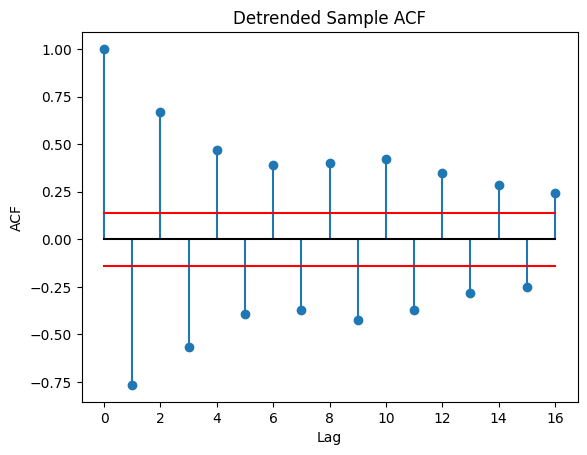

In [1004]:
show_acf(s_d, lag, "Detrended Sample")

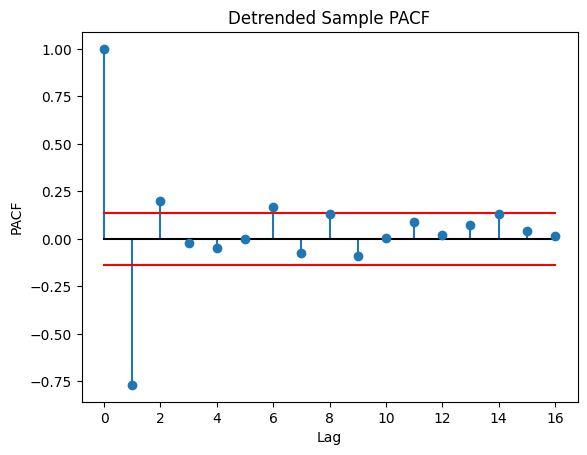

In [1005]:
show_pacf(s_d, lag, "Detrended Sample")

In [1006]:
mod = AutoReg(s_d,1, trend="n")
res = mod.fit()
ar_1 = res.params
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                  200
Model:                     AutoReg(1)   Log Likelihood               -1087.969
Method:               Conditional MLE   S.D. of innovations             57.297
Date:                Sat, 14 Dec 2024   AIC                           2179.937
Time:                        16:41:39   BIC                           2186.524
Sample:                             1   HQIC                          2182.603
                                  200                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
y.L1          -0.7679      0.046    -16.841      0.000      -0.857      -0.679
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3022           +0.0000j            1.3022            0.5000
-----------------------------------------------------------------------------
"""

In [1007]:
mod = AutoReg(s_d,2, trend="n")
res = mod.fit()
ar_2 = res.params
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                  200
Model:                     AutoReg(2)   Log Likelihood               -1079.142
Method:               Conditional MLE   S.D. of innovations             56.333
Date:                Sat, 14 Dec 2024   AIC                           2164.284
Time:                        16:41:39   BIC                           2174.149
Sample:                             2   HQIC                          2168.277
                                  200                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
y.L1          -0.6186      0.070     -8.844      0.000      -0.756      -0.482
y.L2           0.1947      0.070      2.783      0.005       0.058       0.332
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1790           +0.0000j            1.1790            0.5000
AR.2            4.3566           +0.0000j            4.3566            0.0000
-----------------------------------------------------------------------------
"""

In [1008]:
def calc_wn(s, params):
    wn = []
    p = len(params)
    for i in range(p, len(s)):
        wn.append(s[i]-sum([params[j]*s[i-j-1] for j in range(p)]))
    wn = np.array(wn)
    return wn, 1/(len(s)-p)*sum(wn**2)

wn_1, sigma_1 = calc_wn(s_d, ar_1)
wn_2, sigma_2 = calc_wn(s_d, ar_2)

print(ar_1)
print(ar_2)
print(sigma_1, sigma_2)

def AIC(sigma, p, n): return np.log(sigma)+2*p/n
def BIC(sigma, p, n): return np.log(sigma)+p*np.log(n)/n

data = {}

data["AIC"] = [AIC(sigma_1, len(ar_1), len(s_d)),  AIC(sigma_2, len(ar_2), len(s_d))]
data["BIC"] = [BIC(sigma_1, len(ar_1), len(s_d)),  BIC(sigma_2, len(ar_2), len(s_d))]
df = pd.DataFrame(data, index=["AR(1)", "AR(2)"])
df



[-0.7679315]
[-0.61863175  0.1946868 ]
3282.897837320334 3173.3592059771636


,AIC,BIC
AR(1),8.106482,8.122973
AR(2),8.082546,8.115529


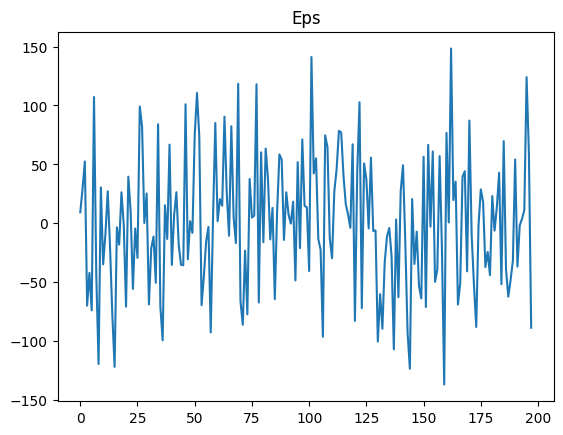

In [1009]:
plt.title("Eps")
plt.plot(range(len(wn_2)), wn_2)
plt.savefig("Eps")

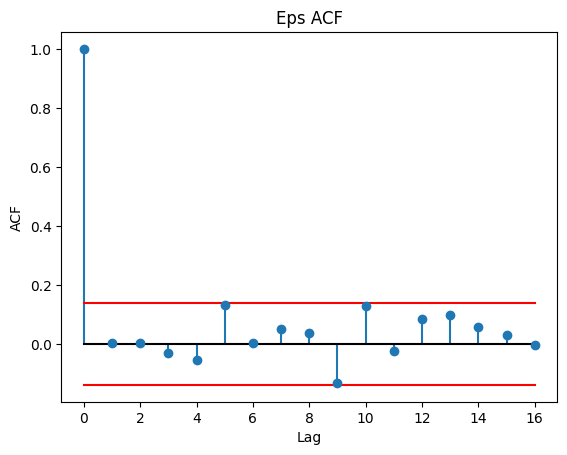

In [1010]:
acf_values = acf(wn_2, nlags=lag, fft=True)
show_acf(wn_2, lag, "Eps")

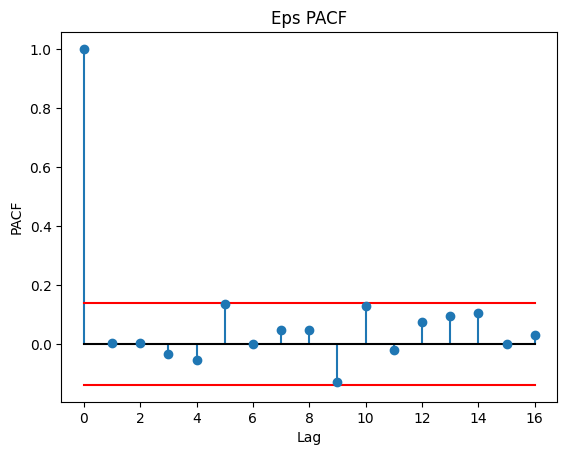

In [1011]:
pacf_values = pacf(wn_2, nlags=lag, method="ywadjusted")
show_pacf(wn_2, lag, "Eps")

In [1012]:
Q = len(s_d)*(2+len(s_d))*sum([ro**2/(len(s_d)-i-1) for i, ro in enumerate(acf_values[1:])])
Q

np.float64(17.30008346586218)

In [1013]:
ppf = chi2.ppf(0.95, lag-len(ar_2))
print(ppf)
abs(Q) < ppf

23.684791304840576


np.True_